# Outliers and impact on ML

## Are outliers should be removed?
It depends on problem statments

## Which ML techniques are sensetive to outliers?

* Naive bayes classifier > `NO`
* SVM > `NO`
* Linear regression > `YES`
* Logistic regression > `YES`
* Decision tree regression & classifier > `NO`
* Ensemble (RF, XGboost, GB) > `NO`
* KNN > `NO`
* Kmeans clustering > `YES`
* Hierarichal clustering > `YES`
* PCA > `YES`
* Neural Netweok > `YES`

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pylab

import scipy.stats as stats

In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sns.set_theme(style="whitegrid")

# Detect outliers

## Age follows a Gaussian distribution

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

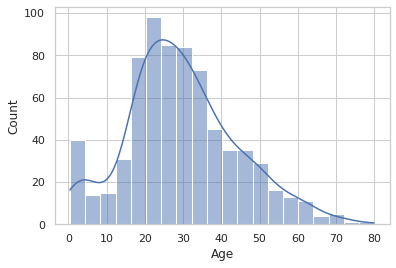

In [20]:
sns.histplot(data['Age'],kde=True)

<AxesSubplot:xlabel='Age'>

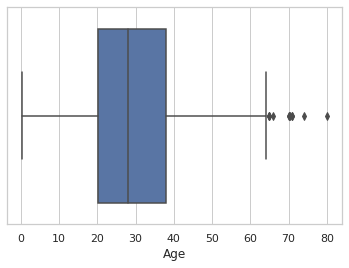

In [18]:
sns.boxplot(x=data['Age'])

In [19]:
data['Age'].describe()

count   714.00000
mean     29.69912
std      14.52650
min       0.42000
25%      20.12500
50%      28.00000
75%      38.00000
max      80.00000
Name: Age, dtype: float64

In [23]:
upper_boundry = data['Age'].mean() + 3*data['Age'].std()
lower_boundry = data['Age'].mean() - 3*data['Age'].std()

print(upper_boundry)
print(lower_boundry)

73.27860964406094
-13.880374349943303


## Fare is skewed data

<AxesSubplot:xlabel='Fare', ylabel='Count'>

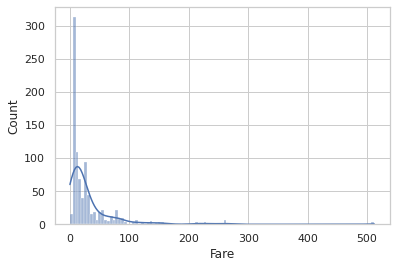

In [35]:
sns.histplot(data['Fare'],kde=True)

In [34]:
data.Fare.describe()

count   891.00000
mean     32.20421
std      49.69343
min       0.00000
25%       7.91040
50%      14.45420
75%      31.00000
max     512.32920
Name: Fare, dtype: float64

In [31]:
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
IQR

23.0896

In [32]:
lower_bridge = data.Fare.quantile(0.25) - (IQR*1.5)
upper_bridge = data.Fare.quantile(0.75) + (IQR*1.5)

print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [33]:
# Extereme outlier
lower_bridge = data.Fare.quantile(0.25) - (IQR*3)
upper_bridge = data.Fare.quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


# Remove outliers

In [36]:
df = data.copy()

In [37]:
df.loc[df.Age > 73, 'Age'] = 73

In [40]:
df.loc[df.Fare > 100, 'Fare'] = 100

In [41]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75000,NaN,Q


<AxesSubplot:xlabel='Fare', ylabel='Count'>

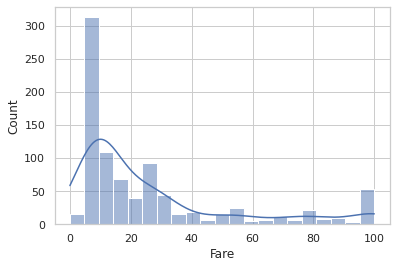

In [42]:
sns.histplot(df['Fare'],kde=True)

In [46]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    df[feature].hist()
    plt.subplot(122)
    stats.probplot(df[feature],dist = 'norm',plot=pylab)
    plt.show()

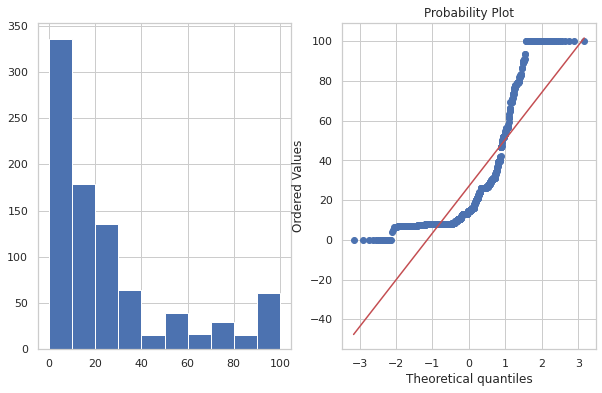

In [49]:
plot_data(df,'Fare')